In [8]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris=load_iris()

In [9]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
df=pd.DataFrame(iris.data)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df['target']=iris.target

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df['feature_name']=df.target.apply(lambda x: iris.target_names[x])
df

,0,1,2,3,target,feature_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [19]:
X=df.drop(['target','feature_name'],axis='columns')
Y=df.target

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
len(X_train)

120

In [22]:
len(X_test)

30

In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=17)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=17)

In [37]:
Y_predicted=model.predict(X_test)

In [38]:
model.score(X_test,Y_test)

0.9666666666666667

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted')

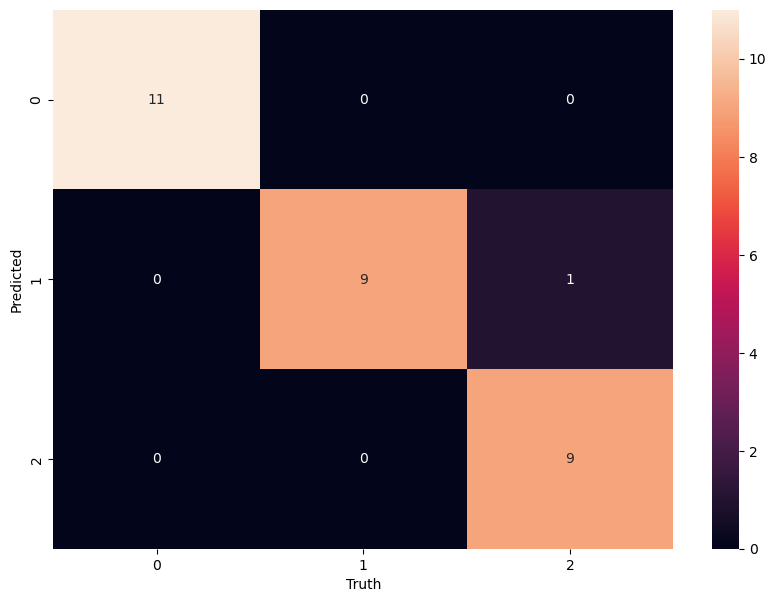

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')